In [2]:
import warnings
warnings.filterwarnings("ignore")
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os,random,shutil
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D,add
import keras
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
import soundfile
from tensorflow import keras
from tensorflow.keras import layers

#Data Wrangling

In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 99% 425M/429M [00:08<00:00, 59.6MB/s]
100% 429M/429M [00:08<00:00, 51.7MB/s]


In [4]:
os.makedirs("/content/Happy")
os.makedirs("/content/Sad")
os.makedirs("/content/input")

name = ('03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-04-02-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-04-02-02-02')


In [5]:
!unzip -qq ravdess-emotional-speech-audio.zip -d input

#Data Preprocessing

In [6]:
i = 1
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        if filename.startswith(name):
            i = i+1
            if filename.startswith(("03-01-03")):
                shutil.copy(os.path.join(dirname, filename),"/content/Happy/")
            else:
                shutil.copy(os.path.join(dirname, filename),"/content/Sad/")
            
print("Count = ",i)

# Happy Files MFCC
i = 0
mfcc_happy = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64)
                mean = np.mean((mfccs).T,axis = 0)
                mfcc_happy.append(mean)
                i = i+1
                if i == 250:
                    break

# Happy Files Mel Spectrogram
i = 0
melspec_happy = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=64)
                mean = np.mean((mel).T,axis = 0)
                melspec_happy.append(mean)
                i = i+1
                if i == 250:
                    break

#Sad Files  MFCC
i = 0
mfcc_sad = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64)
                mean = np.mean((mfccs).T,axis = 0)
                mfcc_sad.append(mean)
                i = i+1
                if i == 250:
                    break

#Sad Files  Mel Spectrogram
i = 0
melspec_sad = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=64)
                mean = np.mean((mel).T,axis = 0)
                melspec_sad.append(mean)
                i = i+1
                if i == 250:
                    break

Count =  769
/content/
/content/.config
/content/.config/logs
/content/.config/logs/2022.10.27
/content/.config/configurations
/content/Sad
/content/Happy
/content/input
/content/input/Actor_03
/content/input/Actor_12
/content/input/Actor_04
/content/input/Actor_21
/content/input/Actor_07
/content/input/Actor_01
/content/input/Actor_06
/content/input/Actor_02
/content/input/audio_speech_actors_01-24
/content/input/audio_speech_actors_01-24/Actor_03
/content/input/audio_speech_actors_01-24/Actor_12
/content/input/audio_speech_actors_01-24/Actor_04
/content/input/audio_speech_actors_01-24/Actor_21
/content/input/audio_speech_actors_01-24/Actor_07
/content/input/audio_speech_actors_01-24/Actor_01
/content/input/audio_speech_actors_01-24/Actor_06
/content/input/audio_speech_actors_01-24/Actor_02
/content/input/audio_speech_actors_01-24/Actor_17
/content/input/audio_speech_actors_01-24/Actor_15
/content/input/audio_speech_actors_01-24/Actor_23
/content/input/audio_speech_actors_01-24/Actor_

In [7]:
happy_features = pd.DataFrame(mfcc_happy,columns=range(1,65))
happy_features["Cat"] = "Happy"
sad_features = pd.DataFrame(mfcc_sad,columns=range(1,65))
sad_features["Cat"] = "Sad"

In [8]:
mfccdf = happy_features.append(sad_features)
mfccdf.to_csv("Mfcc.csv",index=False)

In [9]:
mel_happy = pd.DataFrame(melspec_happy,columns=range(1,65))
mel_happy["Cat"] = "Happy"
mel_sad = pd.DataFrame(melspec_sad,columns=range(1,65))
mel_sad["Cat"] = "Sad"

In [10]:
meldf = mel_happy.append(mel_sad)

In [11]:
meldf.to_csv("Mel.csv",index=False)

# Logistic Regression Model- MFCC

In [12]:
def Log_Reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    lr = LogisticRegression()
    lr.fit(X_train_scale,y_train)
    y_train_pred = lr.predict(X_train_scale)
    y_test_pred = lr.predict(X_test_scale)
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    print("Validation/Test Accuracy = ",accuracy_score(y_test,y_test_pred))

In [13]:
mfccdf["Cat"] = mfccdf["Cat"].replace({'Happy':1,'Sad':0})
X = mfccdf.iloc[:,0:64]
y = mfccdf["Cat"]
Log_Reg(X,y)

Training Accuracy =  0.5667752442996743
Validation/Test Accuracy =  0.23376623376623376


# Logistic Regression Model- Mel Spectrogram

In [14]:
meldf["Cat"] = meldf["Cat"].replace({"Happy": 1,"Sad": 0})
X = meldf.iloc[:,:-1]
y = meldf.iloc[:,-1:]
Log_Reg(X,y)

Training Accuracy =  0.758957654723127
Validation/Test Accuracy =  0.7142857142857143


**Conclusion**:Mel Spectrogram Features Give Better Accuracy using Logistic Regression

# CNN Model - MFCC

In [15]:
X = mfccdf.iloc[:,0:64]
y = mfccdf["Cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y)
X_train = np.array(X_train).reshape(X_train.shape[0],16,4,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,4,1)

In [16]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 4 , 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 4, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 2, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
______________________________________________________

In [17]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 10s 56ms/step - loss: 7.0869 - accuracy: 0.5114 - val_loss: 4.4389 - val_accuracy: 0.5065
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 2.5713 - accuracy: 0.4691 - val_loss: 1.3585 - val_accuracy: 0.4935
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 1.3437 - accuracy: 0.4593 - val_loss: 1.2013 - val_accuracy: 0.4935
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0433 - accuracy: 0.5309 - val_loss: 0.9503 - val_accuracy: 0.5195
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8335 - accuracy: 0.5081 - val_loss: 0.8010 - val_accuracy: 0.4805
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.8288 - accuracy: 0.4788 - val_loss: 0.7976 - val_accuracy: 0.4805
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.8147 - accuracy: 0.4919 - val_loss: 0.7930 - val_accuracy: 0.4545
Epoch 8

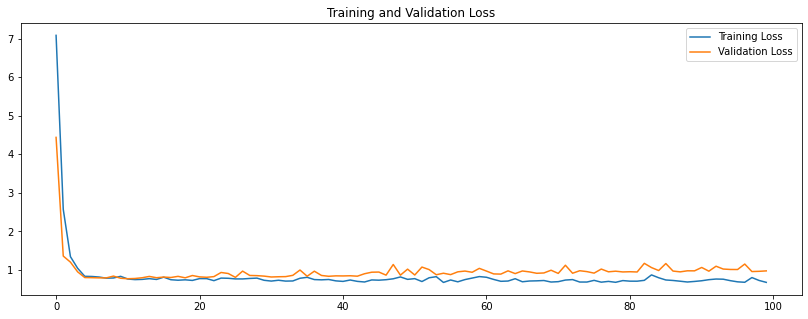

In [18]:
plt.figure(figsize=(14, 5))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper light')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)
print("Training accuracy = ",accuracy_score(y_train,y_train_pred))
print("Validation accuracy = ",accuracy_score(y_test,y_test_pred))

3/3 [==============================] - 0s 5ms/step
Training accuracy =  0.5667752442996743
Validation accuracy =  0.23376623376623376


# CNN Model - Mel Spectrogram

In [22]:
X = meldf.iloc[:,0:64]
y = meldf["Cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y)
X_train = np.array(X_train).reshape(X_train.shape[0],16,4,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,4,1)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics='accuracy')

In [24]:
history_mel = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.6644 - accuracy: 0.6873 - val_loss: 0.6435 - val_accuracy: 0.6623
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6388 - accuracy: 0.6873 - val_loss: 0.6521 - val_accuracy: 0.6753
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.7068 - val_loss: 0.6588 - val_accuracy: 0.7532
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.6938 - val_loss: 0.6547 - val_accuracy: 0.7662
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.7134 - val_loss: 0.6499 - val_accuracy: 0.7273
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.7036 - val_loss: 0.6477 - val_accuracy: 0.7013
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6971 - val_loss: 0.6484 - val_accuracy: 0.7013
Epoch 8/100


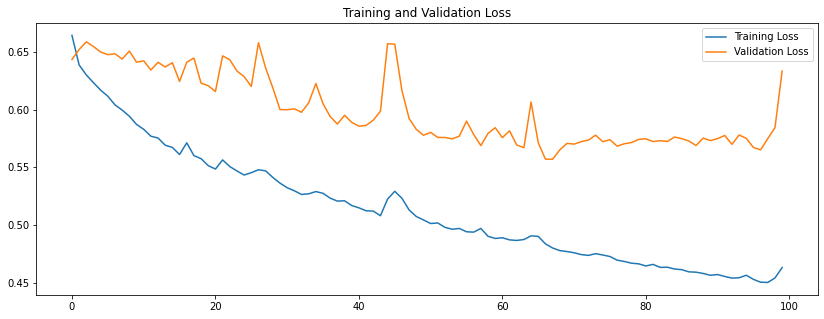

In [26]:
plt.figure(figsize=(14, 5))
loss = history_mel.history['loss']
val_loss = history_mel.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)

3/3 [==============================] - 0s 5ms/step


In [28]:
print("Training accuracy = ",accuracy_score(y_train,y_train_pred))
print("Valiation/Test accuracy = ",accuracy_score(y_test,y_test_pred))

Training accuracy =  0.762214983713355
Valiation/Test accuracy =  0.7532467532467533


**Conclusion**: Mel Spectrogram outperforms MFCC in CNN Model

# Auto Encoders

## Pre Processing 

In [32]:
#Extracting the Files
happys = []
sads = []
i = 0
l_happy = []
for dirname, _, filenames in os.walk('/content/'):
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                happys.append(filename)
    if dirname == "/content/Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                sads.append(filename)

#Naming Conventions for Files
happy = []
sad = []
for i in happys:
    for j in sads:
        x = i[:-4]
        y = j[:-4]
        split_x = x.split('-') 
        split_y = y.split('-')
        if ((split_x[-1] == split_y[-1])and (split_x[-4] == split_y[-4]) and (split_x[-2] == split_y[-2])and (split_x[-3] == split_y[-3])):
            happy.append(i)
            sad.append(j)

In [33]:
maindf = pd.DataFrame()
maindf["happy"] = happy
maindf["sad"] = sad
maindf.tail()

,happy,sad
187,03-01-03-02-02-01-12.wav,03-01-04-02-02-01-12.wav
188,03-01-03-02-02-02-13.wav,03-01-04-02-02-02-13.wav
189,03-01-03-01-01-02-12.wav,03-01-04-01-01-02-12.wav
190,03-01-03-01-02-01-21.wav,03-01-04-01-02-01-21.wav
191,03-01-03-01-01-02-22.wav,03-01-04-01-01-02-22.wav


In [34]:
maindf["happy"] = '/content/Happy/' + maindf["happy"]
maindf["sad"] = '/content/Sad/' + maindf["sad"]
maindf.tail()

,happy,sad
187,/content/Happy/03-01-03-02-02-01-12.wav,/content/Sad/03-01-04-02-02-01-12.wav
188,/content/Happy/03-01-03-02-02-02-13.wav,/content/Sad/03-01-04-02-02-02-13.wav
189,/content/Happy/03-01-03-01-01-02-12.wav,/content/Sad/03-01-04-01-01-02-12.wav
190,/content/Happy/03-01-03-01-02-01-21.wav,/content/Sad/03-01-04-01-02-01-21.wav
191,/content/Happy/03-01-03-01-01-02-22.wav,/content/Sad/03-01-04-01-01-02-22.wav


In [35]:
train, test = train_test_split(maindf, test_size=0.20)

In [36]:
#Train Happy Set MFCC
file_count = 0
train_hf = []
for count_, path in zip(range(train.shape[0]), train['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_hf.append(mfcc_t)
    count_ += 1

#Train Sad Set MFCC
train_sf = []
for count_, path in zip(range(train.shape[0]), train['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_sf.append(mfcc_t)
    count_ += 1

In [37]:
#Test Happy Set MFCC
file_count = 0
test_hf = []
for count_, path in zip(range(test.shape[0]), test['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_hf.append(mfcc_t)
    count_ += 1

#Test Sad Set MFCC
file_count = 0
test_sf = []
for count_, path in zip(range(test.shape[0]), test['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_sf.append(mfcc_t)
    count_ += 1

In [38]:
print("Test Shapes:",np.array(test_hf).shape,np.array(test_sf).shape)
print("Train Shapes:",np.array(train_hf).shape,np.array(train_sf).shape)

Test Shapes: (39, 256, 20) (39, 256, 20)
Train Shapes: (153, 256, 20) (153, 256, 20)


In [39]:
train_hf = np.array(train_hf).reshape(153,256,20,1)
train_sf = np.array(train_sf).reshape(153,256,20,1)
test_hf = np.array(test_hf).reshape(39,256,20,1)
test_sf = np.array(test_sf).reshape(39,256,20,1)

### Autoencoder Model

In [46]:
tf.keras.backend.clear_session()
class AE(tf.keras.models.Model):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(256, 20, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2)])

        self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AE()

In [47]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [48]:
history = autoencoder.fit(train_hf, train_sf, epochs=5,validation_data = (test_hf,test_sf))

Epoch 1/5
5/5 [==============================] - 1s 107ms/step - loss: -2118.4983 - val_loss: -13002.1035
Epoch 2/5
5/5 [==============================] - 0s 49ms/step - loss: -50423.9727 - val_loss: -178956.4219
Epoch 3/5
5/5 [==============================] - 0s 49ms/step - loss: -483960.9375 - val_loss: -1393814.1250
Epoch 4/5
5/5 [==============================] - 0s 48ms/step - loss: -3122013.2500 - val_loss: -7829381.0000
Epoch 5/5
5/5 [==============================] - 0s 48ms/step - loss: -15558937.0000 - val_loss: -34895696.0000


**Conclusion**: Simple Autoencoder loss increases which means it does not learn the features properly

#Variational Autoencoder

In [66]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [67]:
latent_dim = 2
encoder_inputs = keras.Input(shape=(256, 20, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 20, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_8 (Conv2D)              (None, 128, 10, 32)  320         ['input_4[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 64, 5, 64)    18496       ['conv2d_8[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 20480)        0           ['conv2d_9[0][0]']         

In [68]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64 * 5 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((64, 5, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 20480)             61440     
                                                                 
 reshape_1 (Reshape)         (None, 64, 5, 64)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 128, 10, 64)      36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 256, 20, 32)      18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 256, 20, 1)       289 

In [69]:
class VarAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VarAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [70]:
vae = VarAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [71]:
history = vae.fit(train_hf,
                   epochs=3)

Epoch 1/3
5/5 [==============================] - 1s 19ms/step - loss: -4222.9751 - reconstruction_loss: -62179.6133 - kl_loss: 19266.0918
Epoch 2/3
5/5 [==============================] - 0s 18ms/step - loss: -522270.1979 - reconstruction_loss: -854678.3125 - kl_loss: 64806.9922
Epoch 3/3
5/5 [==============================] - 0s 17ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan


**Conclusion**:High loss of Variational Autoencoder is indicative of very poor learning of algorithm